## Dataset Overview

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor, ElasticNet, LogisticRegression
from sklearn.metrics import (
    mean_absolute_error, 
    mean_squared_error, 
    r2_score, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    confusion_matrix, 
    classification_report
)
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from sklearn import feature_selection, preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=7)

| **Variable**              | **Description**                                                                 | **Type**    | **Units**  |
|---------------------------|---------------------------------------------------------------------------------|-------------|------------|
| **ID**                     | Patient ID                                                                       | Integer     | None       |
| **Diabetes_binary**        | Whether the patient has diabetes, prediabetes, or is healthy (0 = no, 1 = yes)   | Binary      | None       |
| **HighBP**                 | Whether the patient has high blood pressure (0 = no, 1 = yes)                    | Binary      | None       |
| **HighChol**               | Whether the patient has high cholesterol (0 = no, 1 = yes)                       | Binary      | None       |
| **CholCheck**              | Whether the patient had a cholesterol check in the last 5 years (0 = no, 1 = yes) | Binary      | None       |
| **BMI**                    | Body Mass Index (BMI)                                                           | Integer     | None       |
| **Smoker**                 | Whether the patient has ever smoked at least 100 cigarettes (0 = no, 1 = yes)    | Binary      | None       |
| **Stroke**                 | Whether the patient has ever had a stroke (0 = no, 1 = yes)                      | Binary      | None       |
| **HeartDiseaseorAttack**   | Whether the patient has coronary heart disease or a myocardial infarction (0 = no, 1 = yes) | Binary | None       |
| **PhysActivity**           | Whether the patient engages in physical activity in the last 30 days (0 = no, 1 = yes) | Binary  | None       |
| **Fruits**                 | Whether the patient consumes fruits one or more times per day (0 = no, 1 = yes)  | Binary      | None       |
| **Veggies**                | Whether the patient consumes vegetables one or more times per day (0 = no, 1 = yes) | Binary  | None       |
| **HvyAlcoholConsump**      | Whether the patient is a heavy drinker (1 = yes, 0 = no)                         | Binary      | None       |
| **AnyHealthcare**          | Whether the patient has any healthcare coverage (0 = no, 1 = yes)               | Binary      | None       |
| **NoDocbcCost**            | Whether the patient did not see a doctor due to cost (0 = no, 1 = yes)          | Binary      | None       |
| **GenHlth**                | General health rating (1 = excellent, 5 = poor)                                 | Integer     | None       |
| **MentHlth**               | Mental health in the past 30 days (0 = good, 30 = poor)                         | Integer     | Days       |
| **PhysHlth**               | Physical health in the past 30 days (0 = good, 30 = poor)                       | Integer     | Days       |
| **DiffWalk**               | Whether the patient has serious difficulty walking or climbing stairs (0 = no, 1 = yes) | Binary | None       |
| **Sex**                    | Gender of the patient (0 = female, 1 = male)                                    | Binary      | None       |
| **Age**                    | Age category (13-level age category based on _AGEG5YR codebook)                 | Integer     | None       |
| **Education**              | Education level (1 = less than high school, 6 = graduate degree, based on EDUCA codebook) | Integer | None       |
| **Income**                 | Income level (1-8 scale based on INCOME2 codebook)                              | Integer     | None       |


In [2]:
url = "https://archive.ics.uci.edu/static/public/891/data.csv"
data = pd.read_csv(url)
display(data.describe())
print(data.isna().sum()) 

ID  Diabetes_binary         HighBP       HighChol  \
count  253680.000000    253680.000000  253680.000000  253680.000000   
mean   126839.500000         0.139333       0.429001       0.424121   
std     73231.252481         0.346294       0.494934       0.494210   
min         0.000000         0.000000       0.000000       0.000000   
25%     63419.750000         0.000000       0.000000       0.000000   
50%    126839.500000         0.000000       0.000000       0.000000   
75%    190259.250000         0.000000       1.000000       1.000000   
max    253679.000000         1.000000       1.000000       1.000000   

           CholCheck            BMI         Smoker         Stroke  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.962670      28.382364       0.443169       0.040571   
std         0.189571       6.608694       0.496761       0.197294   
min         0.000000      12.000000       0.000000       0.000000   
25%         1.000000      24.000000       0.000000       0.000000   
50%         1.000000      27.000000       0.000000       0.000000   
75%         1.000000      31.000000       1.000000       0.000000   
max         1.000000      98.000000       1.000000       1.000000   

       HeartDiseaseorAttack   PhysActivity  ...  AnyHealthcare    NoDocbcCost  \
count         253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean               0.094186       0.756544  ...       0.951053       0.084177   
std                0.292087       0.429169  ...       0.215759       0.277654   
min                0.000000       0.000000  ...       0.000000       0.000000   
25%                0.000000       1.000000  ...       1.000000       0.000000   
50%                0.000000       1.000000  ...       1.000000       0.000000   
75%                0.000000       1.000000  ...       1.000000       0.000000   
max                1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 23 columns]

ID                      0
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


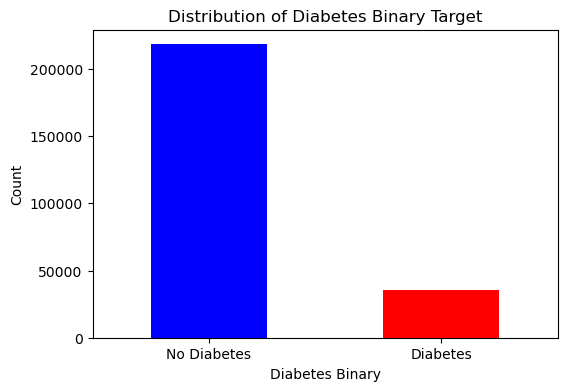

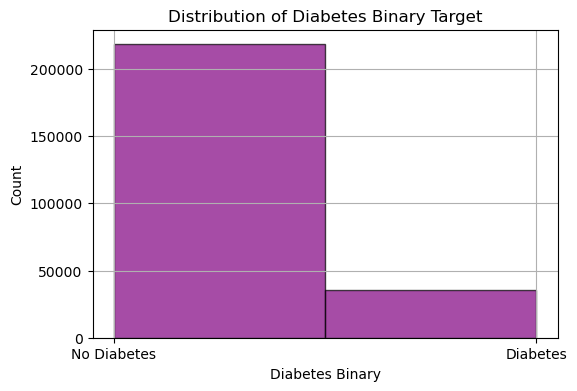

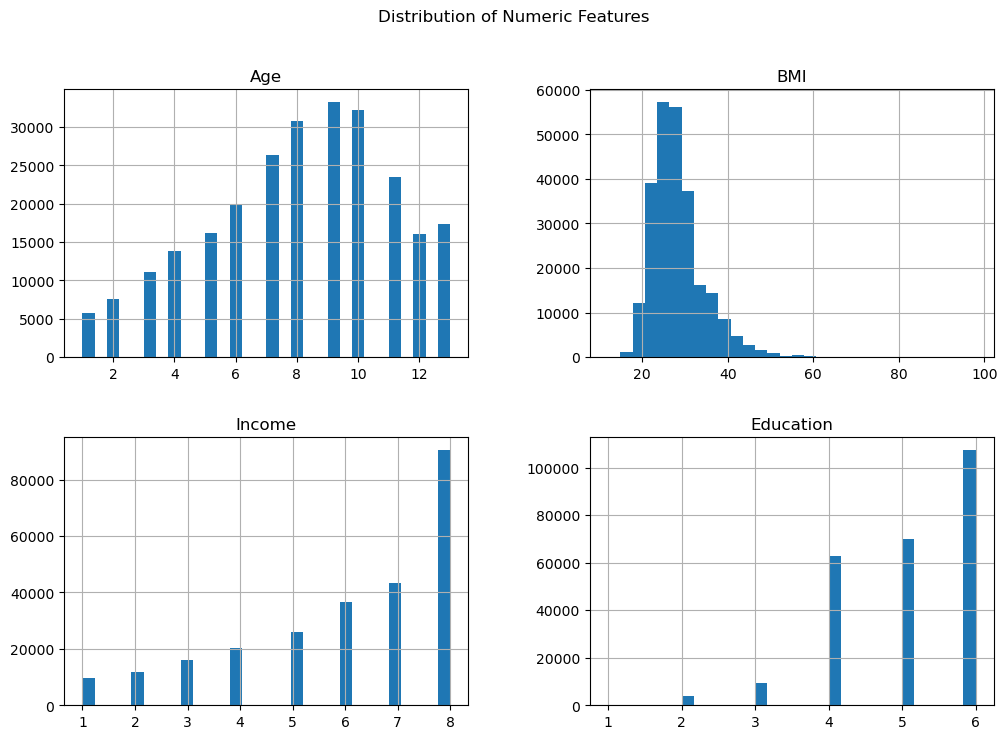

                Age       BMI    Income  Education
Age        1.000000 -0.036618 -0.127775  -0.101901
BMI       -0.036618  1.000000 -0.100069  -0.103932
Income    -0.127775 -0.100069  1.000000   0.449106
Education -0.101901 -0.103932  0.449106   1.000000


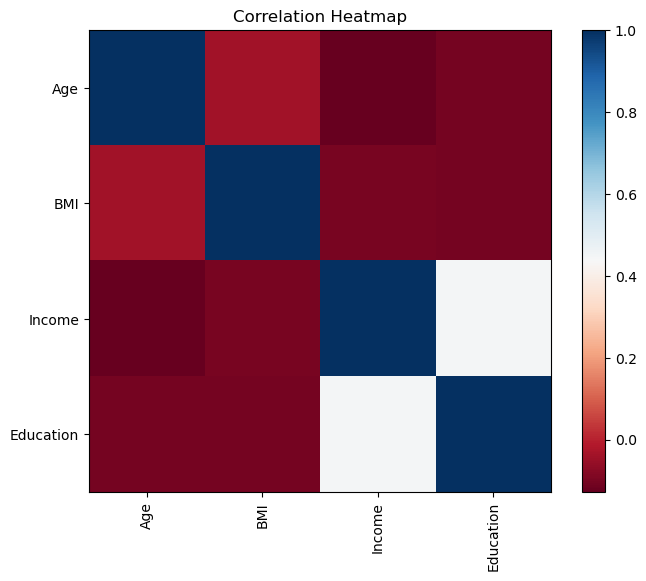

In [3]:
plt.figure(figsize=(6, 4))
data['Diabetes_binary'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Diabetes Binary Target')
plt.xlabel('Diabetes Binary')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], rotation=0)
plt.show()

# Histogram for the Diabetes_binary target
plt.figure(figsize=(6, 4))
data['Diabetes_binary'].hist(bins=2, color='purple', alpha=0.7, edgecolor='black')
plt.title('Distribution of Diabetes Binary Target')
plt.xlabel('Diabetes Binary')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], rotation=0)
plt.show()

# Histogram for the numeric features
numeric_features = ['Age', 'BMI', 'Income', 'Education']
data[numeric_features].hist(bins=30, figsize=(12, 8))
plt.suptitle('Distribution of Numeric Features')
plt.show()

# Correlation heatmap for numeric features
correlation_matrix = data[numeric_features].corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='RdBu', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

### Split and Normalize Data

In [4]:
target=data.Diabetes_binary
data_att=data.drop(columns=['Diabetes_binary', 'ID'])

from sklearn.model_selection import train_test_split
train, test, target_train, target_test = train_test_split(data_att, target, test_size=0.2, random_state=33, stratify=target)

print(test.shape)
print(train.shape)

min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(train)

train_norm = min_max_scaler.transform(train)
test_norm = min_max_scaler.transform(test)
target_train = np.array(target_train)
target_test = np.array(target_test)

(50736, 21)
(202944, 21)


Class Distribution:
0    174667
1     28277
Name: count, dtype: int64


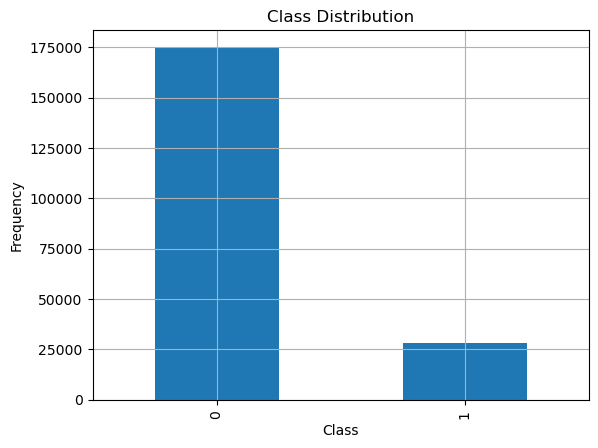

Imbalance Ratio: 6.18


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
target_train_series = pd.Series(target_train)
class_counts = target_train_series.value_counts()
print("Class Distribution:")
print(class_counts)
class_counts.plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.grid()
plt.show()

imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

In [6]:
target_train_counts=pd.Series(target_train)
print('\nClass distribution of training data:\n', target_train_counts.value_counts())

from imblearn.over_sampling import SMOTE
import pandas as pd

smote = SMOTE(sampling_strategy='minority')
train_resampled, target_train_resampled = smote.fit_resample(train_norm, target_train)

target_train_resampled_series = pd.Series(target_train_resampled)
print('\nClass distribution of SMOTE training data:\n', target_train_resampled_series.value_counts())



Class distribution of training data:
 0    174667
1     28277
Name: count, dtype: int64

Class distribution of SMOTE training data:
 0    174667
1    174667
Name: count, dtype: int64


## Model 1: Logistic Regression 

__Normalized Data__

In [7]:
from sklearn.linear_model import LogisticRegression

logModel = LogisticRegression()

model=logModel.fit(train_norm, target_train)
log_pred=logModel.predict(test_norm)

log_testing_report = classification_report(target_test, log_pred)
log_testing_accuracy = accuracy_score(target_test, log_pred)
log_testing_confusion_matrix = confusion_matrix(target_test, log_pred)
print("Classification Report:\n", log_testing_report)
print("Confusion Matrix:\n", log_testing_confusion_matrix)
print("Testing Accuracy:", log_testing_accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     43667
           1       0.54      0.15      0.23      7069

    accuracy                           0.86     50736
   macro avg       0.71      0.56      0.58     50736
weighted avg       0.83      0.86      0.83     50736

Confusion Matrix:
 [[42746   921]
 [ 6006  1063]]
Testing Accuracy: 0.8634697256385998


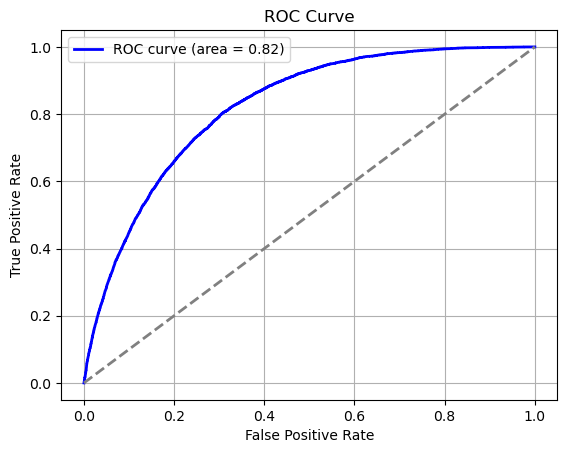

In [8]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

log_probs = logModel.predict_proba(test_norm)[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, log_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

__SMOTE Data__

In [9]:
from sklearn.linear_model import LogisticRegression

logModel = LogisticRegression()

model2=logModel.fit(train_resampled, target_train_resampled)
log_pred2=logModel.predict(test_norm)

log_testing_report = classification_report(target_test, log_pred2)
log_testing_accuracy = accuracy_score(target_test, log_pred)
log_testing_confusion_matrix = confusion_matrix(target_test, log_pred)
print("Classification Report:\n", log_testing_report)
print("Confusion Matrix:\n", log_testing_confusion_matrix)
print("Testing Accuracy:", log_testing_accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.74      0.83     43667
           1       0.32      0.75      0.45      7069

    accuracy                           0.74     50736
   macro avg       0.63      0.74      0.64     50736
weighted avg       0.86      0.74      0.78     50736

Confusion Matrix:
 [[42746   921]
 [ 6006  1063]]
Testing Accuracy: 0.8634697256385998


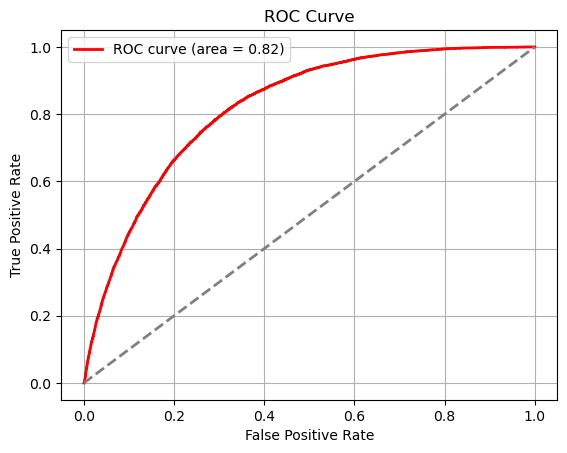

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

log_probs = logModel.predict_proba(test_norm)[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, log_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend()
plt.show()

## Model 2: Decision Tree Classification

__Normalized Data__

Accuracy:0.806 

Classification report
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     43667
           1       0.30      0.30      0.30      7069

    accuracy                           0.81     50736
   macro avg       0.60      0.60      0.60     50736
weighted avg       0.81      0.81      0.81     50736
 

Feature Importances:
[0.09 0.02 0.   0.14 0.04 0.01 0.02 0.03 0.03 0.03 0.01 0.01 0.02 0.08 0.07 0.09 0.02 0.03 0.1  0.07 0.1 ]


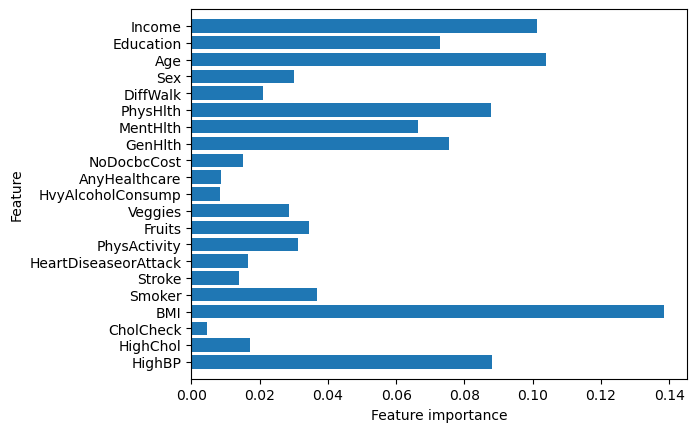

Accuracy:0.860 

Classification report
              precision    recall  f1-score   support

           0       0.87      0.99      0.92     43667
           1       0.49      0.06      0.11      7069

    accuracy                           0.86     50736
   macro avg       0.68      0.53      0.52     50736
weighted avg       0.81      0.86      0.81     50736
 

 1  0.8607
 6  0.8607
11  0.8607
16  0.8605
21  0.8613
26  0.8615
31  0.8608
36  0.8548
41  0.8518
46  0.8381
51  0.8374
56  0.8290
61  0.8256
66  0.8116
71  0.8114
76  0.8055
81  0.8037
86  0.8023
91  0.8005
96  0.8009
5
Optimal percentile of features:26 

Optimal number of features:5 



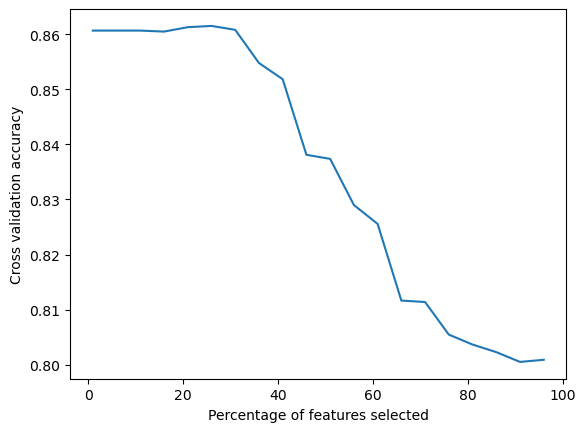

Accuracy:0.860 

Classification report
              precision    recall  f1-score   support

           0       0.87      0.99      0.92     43667
           1       0.48      0.05      0.10      7069

    accuracy                           0.86     50736
   macro avg       0.68      0.52      0.51     50736
weighted avg       0.81      0.86      0.81     50736
 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
CPU times: user 708 ms, sys: 249 ms, total: 957 ms
Wall time: 26.6 s
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.8647262254637799


In [11]:
from sklearn import neighbors, tree, naive_bayes
def measure_performance(data_att, target, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    pred = clf.predict(data_att)   
    if show_accuracy:
         print("Accuracy:{0:.3f}".format(metrics.accuracy_score(target, pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(target, pred),"\n")
      
    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(target, pred),"\n")

from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt = dt.fit(train_norm, target_train)
from sklearn import metrics

measure_performance(test_norm, target_test, dt, show_confusion_matrix=False)

print("Feature Importances:\n{}".format(dt.feature_importances_))

import pylab as plt
%matplotlib inline

def plot_feature_importances(model, n_features, feature_names):
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances(dt, len(data_att.columns), data_att.columns)
plt.show()

fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=30)
train_fs = fs.fit_transform(train_norm, target_train)

dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(train_fs, target_train)
test_fs = fs.transform(test_norm)
measure_performance(test_fs, target_test, dt, show_confusion_matrix=False)

from sklearn.model_selection import cross_val_score
dt = tree.DecisionTreeClassifier(criterion='entropy')

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    train_fs = fs.fit_transform(train_norm, target_train)
    scores = cross_val_score(dt, train_fs, target_train, cv=5)
    print("%2d  %0.4f" % (i, scores.mean()))
    results = np.append(results, scores.mean())

optimal_percentile_ind = np.where(results == results.max())[0][0]
print(optimal_percentile_ind)

optimal_percentile_ind = np.where(results == results.max())[0][0]
print("Optimal percentile of features:{0}".format(percentiles[optimal_percentile_ind]), "\n")
optimal_num_features = int(percentiles[optimal_percentile_ind]*len(data_att.columns)/100)
print("Optimal number of features:{0}".format(optimal_num_features), "\n")

import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)
pl.show()

fs = feature_selection.SelectKBest(feature_selection.chi2, k=optimal_num_features)
train_fs = fs.fit_transform(train_norm, target_train)
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(train_fs, target_train)
test_fs = fs.transform(test_norm)
measure_performance(test_fs, target_test, dt, show_confusion_matrix=False)

from sklearn.model_selection import GridSearchCV

dt = tree.DecisionTreeClassifier()

parameters = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [5, 10, 15],  
    'min_samples_leaf': [1, 10, 20],  
    'min_samples_split': [2, 10],  
}

gs = GridSearchCV(dt, parameters, verbose=1, cv=5, n_jobs=-1)

%time _ = gs.fit(train_norm, target_train)

print(gs.best_params_, gs.best_score_)

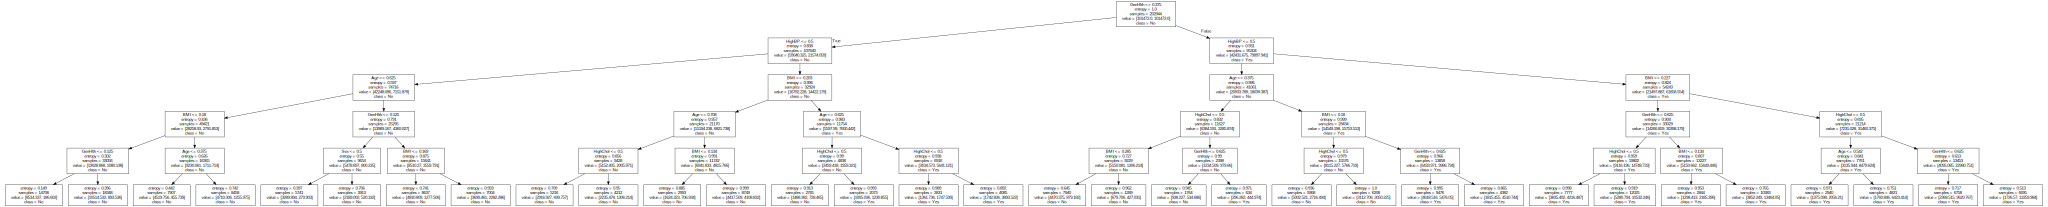

In [12]:
grid_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=2, min_samples_leaf=1, class_weight='balanced')
grid_tree = grid_tree.fit(train_norm, target_train)
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(grid_tree,out_file='tree.dot', feature_names=data_att.columns, class_names=["No","Yes"])

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

**SMOTE Data**


Decision Tree Classifier
Score on Test:  0.48701119520655944
Score on Training:  0.9882891444863655

Gaussian Classifier
Score on Training:  0.7289184562624881
Score on Test:  0.7019473352254809

Naive Bayes Classifier
Score on Training:  0.6956437106036057
Score on Test:  0.7357497634815515
Accuracy:0.485 

Classification report
              precision    recall  f1-score   support

           0       0.93      0.43      0.59     43667
           1       0.19      0.79      0.30      7069

    accuracy                           0.48     50736
   macro avg       0.56      0.61      0.45     50736
weighted avg       0.82      0.48      0.55     50736
 

Feature Importances:
[0.04 0.01 0.   0.3  0.02 0.01 0.01 0.01 0.01 0.01 0.   0.   0.01 0.23 0.03 0.04 0.01 0.01 0.16 0.03 0.05]


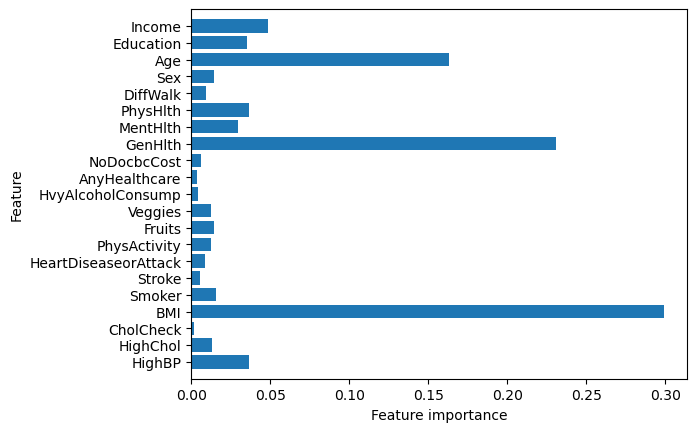

Accuracy:0.820 

Classification report
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     43667
           1       0.36      0.39      0.38      7069

    accuracy                           0.82     50736
   macro avg       0.63      0.64      0.64     50736
weighted avg       0.83      0.82      0.82     50736
 

 1  0.6897
 6  0.6956
11  0.6996
16  0.7073
21  0.7642
26  0.8101
31  0.8106
36  0.8113
41  0.8118
46  0.8625
51  0.8691
56  0.8681
61  0.8654
66  0.8667
71  0.8637
76  0.8629
81  0.8629
86  0.8628
91  0.8619
96  0.8619
10
Optimal percentile of features:51 

Optimal number of features:10 



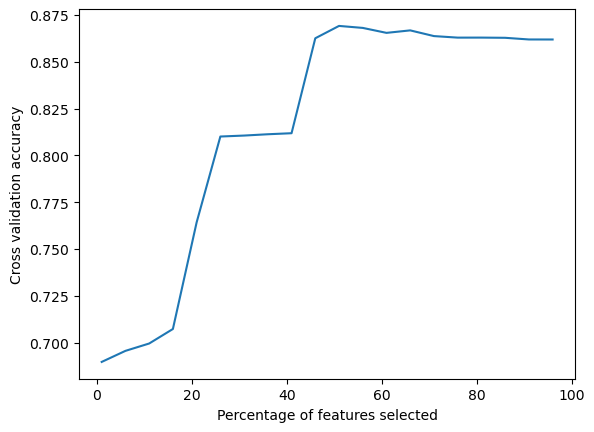

Accuracy:0.841 

Classification report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     43667
           1       0.38      0.23      0.29      7069

    accuracy                           0.84     50736
   macro avg       0.63      0.59      0.60     50736
weighted avg       0.81      0.84      0.82     50736
 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
CPU times: user 2.82 s, sys: 496 ms, total: 3.31 s
Wall time: 1min 58s
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10} 0.8707513346764933


In [13]:
from sklearn import neighbors, tree, naive_bayes
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
treeclf = treeclf.fit(train_resampled, target_train_resampled)
print("\nDecision Tree Classifier")
print("Score on Test: ", treeclf.score(test_norm, target_test))
print("Score on Training: ",  treeclf.score(train_resampled, target_train_resampled))

nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(train_resampled, target_train_resampled)
print("\nGaussian Classifier")
print("Score on Training: ", nbclf.score(train_resampled, target_train_resampled))
print("Score on Test: ", nbclf.score(test_norm, target_test))

print("\nNaive Bayes Classifier")
nbmclf = naive_bayes.MultinomialNB()
nbmclf = nbmclf.fit(train_resampled, target_train_resampled)
print("Score on Training: ", nbmclf.score(train_resampled, target_train_resampled))
print("Score on Test: ", nbmclf.score(test_norm, target_test))

def measure_performance(data_att, target, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    pred = clf.predict(data_att)   
    if show_accuracy:
         print("Accuracy:{0:.3f}".format(metrics.accuracy_score(target, pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(target, pred),"\n")
      
    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(target, pred),"\n")
        
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt = dt.fit(train_resampled, target_train_resampled)
from sklearn import metrics

measure_performance(test_norm, target_test, dt, show_confusion_matrix=False)

print("Feature Importances:\n{}".format(dt.feature_importances_))

import pylab as plt
%matplotlib inline

def plot_feature_importances(model, n_features, feature_names):
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances(dt, len(data_att.columns), data_att.columns)
plt.show()

fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=30)
train_fs = fs.fit_transform(train_resampled, target_train_resampled)

dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(train_fs, target_train_resampled)
test_fs = fs.transform(test_norm)
measure_performance(test_fs, target_test, dt, show_confusion_matrix=False)

from sklearn.model_selection import cross_val_score
dt = tree.DecisionTreeClassifier(criterion='entropy')

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    train_fs = fs.fit_transform(train_resampled, target_train_resampled)
    scores = cross_val_score(dt, train_fs, target_train_resampled, cv=5)
    print("%2d  %0.4f" % (i, scores.mean()))
    results = np.append(results, scores.mean())
    
optimal_percentile_ind = np.where(results == results.max())[0][0]
print(optimal_percentile_ind)

optimal_percentile_ind = np.where(results == results.max())[0][0]
print("Optimal percentile of features:{0}".format(percentiles[optimal_percentile_ind]), "\n")
optimal_num_features = int(percentiles[optimal_percentile_ind]*len(data_att.columns)/100)
print("Optimal number of features:{0}".format(optimal_num_features), "\n")

import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)
pl.show()

fs = feature_selection.SelectKBest(feature_selection.chi2, k=optimal_num_features)
train_fs = fs.fit_transform(train_resampled, target_train_resampled)
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(train_fs, target_train_resampled)
test_fs = fs.transform(test_norm)
measure_performance(test_fs, target_test, dt, show_confusion_matrix=False)

from sklearn.model_selection import GridSearchCV

dt = tree.DecisionTreeClassifier()

parameters = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [5, 10, 15], 
    'min_samples_leaf': [1, 10, 20],  
    'min_samples_split': [2, 10],  
}

gs = GridSearchCV(dt, parameters, verbose=1, cv=5, n_jobs=-1)

%time _ = gs.fit(train_resampled, target_train_resampled)

print(gs.best_params_, gs.best_score_)

In [14]:
grid_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=10, min_samples_leaf=1, class_weight='balanced')
grid_tree = grid_tree.fit(train_resampled, target_train_resampled)
from sklearn.tree import export_graphviz
export_graphviz(grid_tree,out_file='tree.dot', feature_names=data_att.columns, class_names=["No","Yes"])

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Model 3: Naive Bayes Classification

**Normalized Data**

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86     43667
           1       0.32      0.56      0.41      7069

    accuracy                           0.77     50736
   macro avg       0.62      0.68      0.63     50736
weighted avg       0.84      0.77      0.80     50736

Confusion Matrix:
[[35161  8506]
 [ 3092  3977]]
Cross-Validation Accuracy Scores: [0.77 0.77 0.78 0.77 0.77]
Mean Accuracy: 0.7731788113727929
Standard Deviation: 0.0024931207321623773


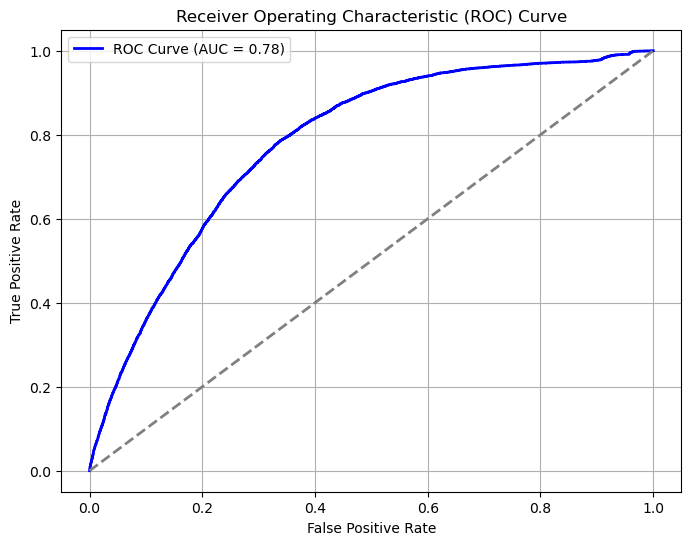

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

nb_model = GaussianNB()
nb_model.fit(train_norm, target_train)
nb_pred = nb_model.predict(test_norm)

print("Naive Bayes Classification Report:")
print(classification_report(target_test, nb_pred))

print("Confusion Matrix:")
print(confusion_matrix(target_test, nb_pred))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(nb_model, train_norm, target_train, cv=cv, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))
nb_proba = nb_model.predict_proba(test_norm)[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, nb_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid()
plt.show()

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
nb_model = GaussianNB()
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_norm, target_train)
print("\nBest Parameters:", grid_search.best_params_)
print("\nBest Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'var_smoothing': 1e-09}

Best Cross-Validation Accuracy: 0.7731443224254594


**SMOTE Data**

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.69      0.80     43667
           1       0.28      0.75      0.41      7069

    accuracy                           0.70     50736
   macro avg       0.61      0.72      0.61     50736
weighted avg       0.85      0.70      0.75     50736

Confusion Matrix:
[[30296 13371]
 [ 1751  5318]]
Cross-Validation Accuracy Scores: [0.73 0.73 0.73 0.73 0.73]
Mean Accuracy: 0.7289842936101004
Standard Deviation: 0.0008920838356202417


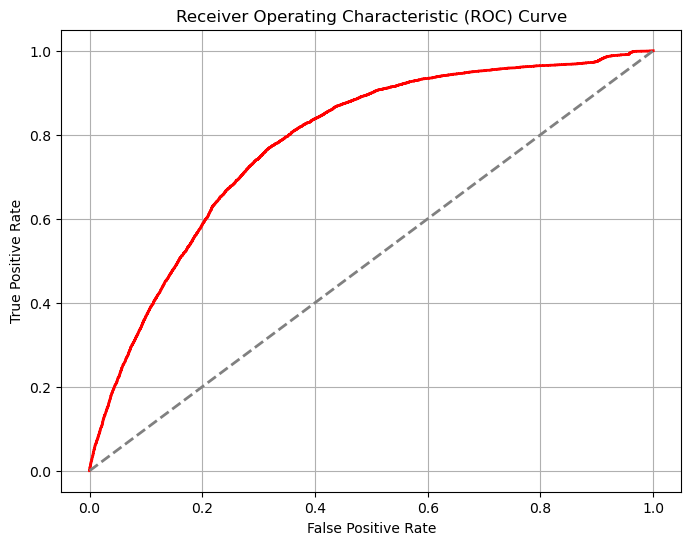

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

nb_model = GaussianNB()

nb_model.fit(train_resampled, target_train_resampled)

nb_pred = nb_model.predict(test_norm)

print("Naive Bayes Classification Report:")
print(classification_report(target_test, nb_pred))

print("Confusion Matrix:")
print(confusion_matrix(target_test, nb_pred))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(nb_model, train_resampled, target_train_resampled, cv=cv, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))
# Get predicted probabilities for the positive class
nb_proba = nb_model.predict_proba(test_norm)[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, nb_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.grid()
plt.show()

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
nb_model = GaussianNB()
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_resampled, target_train_resampled)
print("\nBest Parameters:", grid_search.best_params_)
print("\nBest Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'var_smoothing': 1e-09}

Best Cross-Validation Accuracy: 0.7285864013416798


## Model 4: K Nearest Neighbors

**Normalized Data**

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

#Initial Model
knn = KNeighborsClassifier()
knn.fit(train_norm, target_train)
y_pred = knn.predict(test_norm)
print("\nClassification Report:")
print(classification_report(target_test, y_pred))

param_grid = {'n_neighbors': range(3, 21, 2)}  

grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_norm, target_train)
print(f"Best n_neighbors: {grid_search.best_params_['n_neighbors']}")

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(test_norm)

print("\nGrid Classification Report:")
print(classification_report(target_test, y_pred))

print("Grid Confusion Matrix:")
conf_matrix = confusion_matrix(target_test, y_pred)
print(conf_matrix)

NameError: name 'train_norm' is not defined

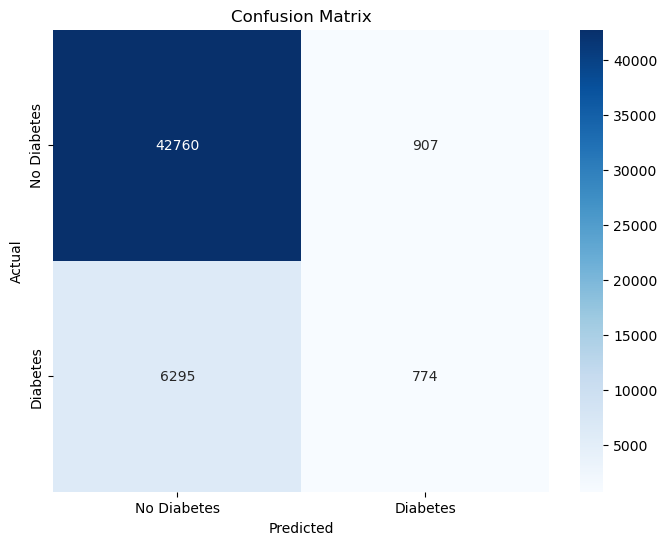

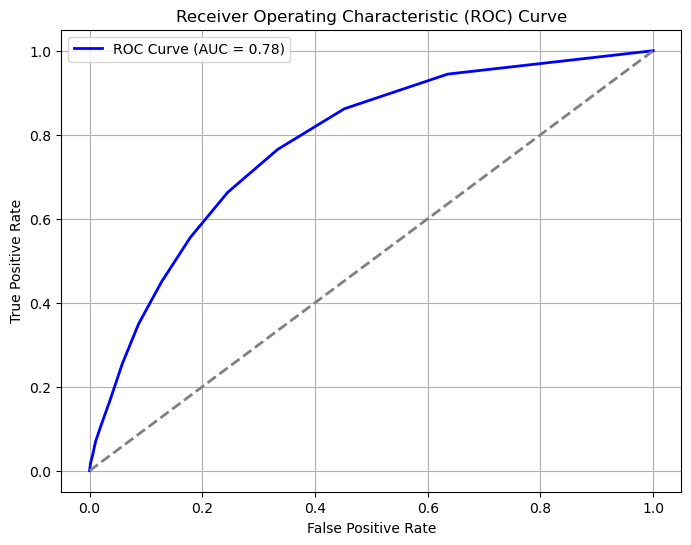

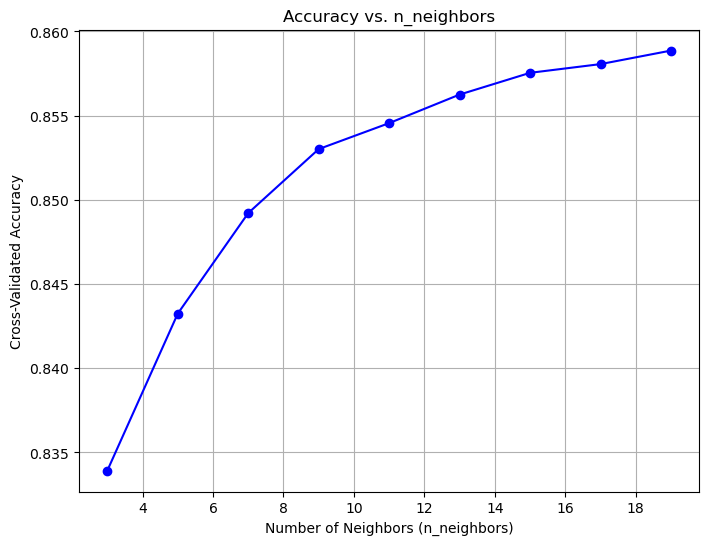

In [20]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

y_proba = best_knn.predict_proba(test_norm)[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid()
plt.show()

cv_results = grid_search.cv_results_
n_neighbors = range(3, 21, 2)
mean_test_scores = cv_results['mean_test_score']

plt.figure(figsize=(8, 6))
plt.plot(n_neighbors, mean_test_scores, marker='o', color='blue')
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Accuracy vs. n_neighbors")
plt.grid()
plt.show()

**SMOTE Data**

In [21]:
#Initial Model
knn = KNeighborsClassifier()
knn.fit(train_resampled, target_train_resampled)
y_pred = knn.predict(test_norm)
print("\nClassification Report:")
print(classification_report(target_test, y_pred))

param_grid = {'n_neighbors': range(3, 21, 2)}  

grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_resampled, target_train_resampled)
print(f"Best n_neighbors: {grid_search.best_params_['n_neighbors']}")

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(test_norm)

print("\nClassification Report:")
print(classification_report(target_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(target_test, y_pred)
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82     43667
           1       0.27      0.59      0.37      7069

    accuracy                           0.72     50736
   macro avg       0.60      0.67      0.60     50736
weighted avg       0.83      0.72      0.76     50736

Best n_neighbors: 3

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84     43667
           1       0.27      0.51      0.35      7069

    accuracy                           0.74     50736
   macro avg       0.59      0.64      0.60     50736
weighted avg       0.82      0.74      0.77     50736

Confusion Matrix:
[[34073  9594]
 [ 3480  3589]]


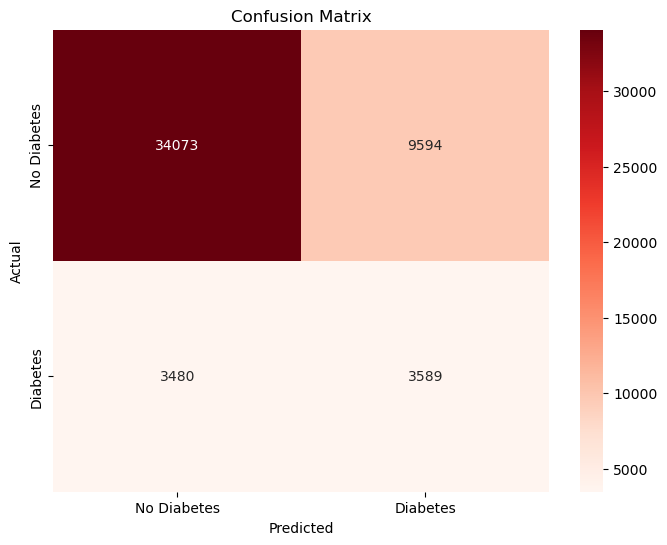

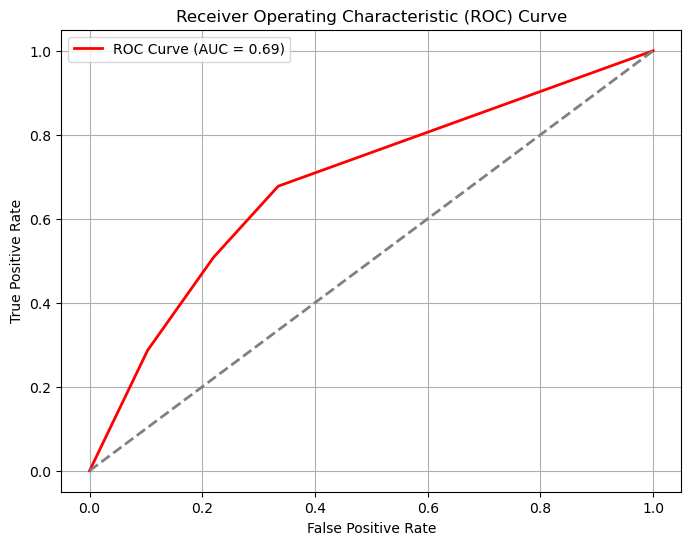

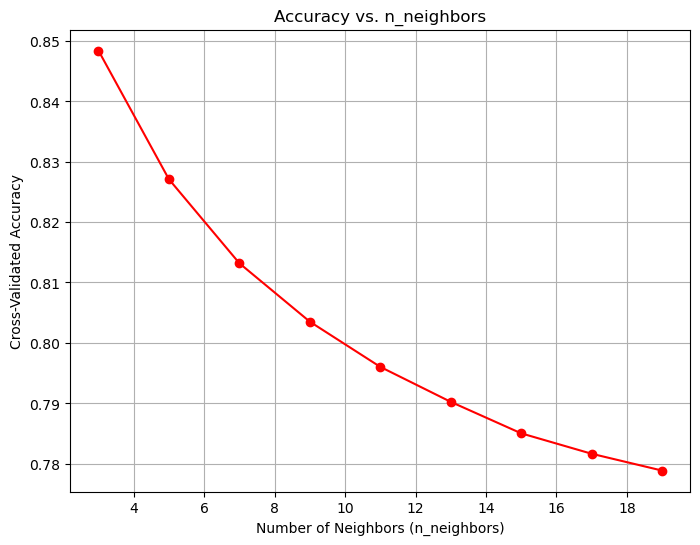

In [22]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

y_proba = best_knn.predict_proba(test_norm)[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid()
plt.show()

cv_results = grid_search.cv_results_
n_neighbors = range(3, 21, 2)
mean_test_scores = cv_results['mean_test_score']

plt.figure(figsize=(8, 6))
plt.plot(n_neighbors, mean_test_scores, marker='o', color='red')
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Accuracy vs. n_neighbors")
plt.grid()
plt.show()

## Ensemble Model

__Normalized Data__

Performance of logModel:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43667
           1       0.54      0.15      0.23      7069

    accuracy                           0.86     50736
   macro avg       0.71      0.56      0.58     50736
weighted avg       0.83      0.86      0.83     50736

Performance of dt_Model:
              precision    recall  f1-score   support

           0       0.95      0.70      0.80     43667
           1       0.29      0.76      0.42      7069

    accuracy                           0.71     50736
   macro avg       0.62      0.73      0.61     50736
weighted avg       0.86      0.71      0.75     50736

Performance of nb_Model:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86     43667
           1       0.32      0.56      0.41      7069

    accuracy                           0.77     50736
   macro avg       0.62      0.68      0.63     50736

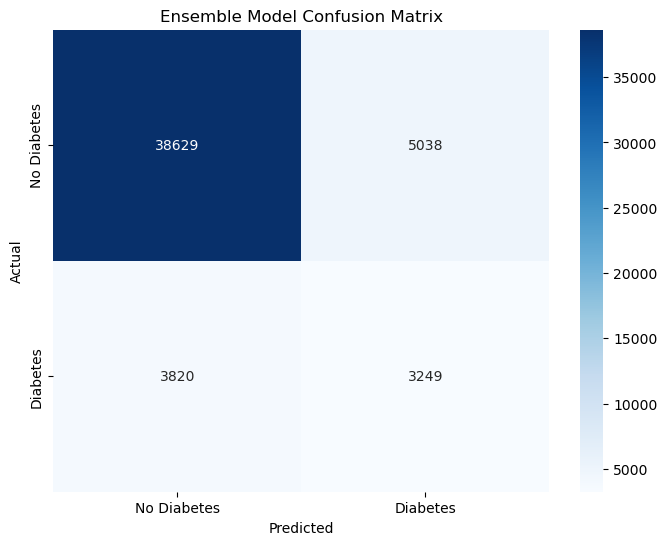

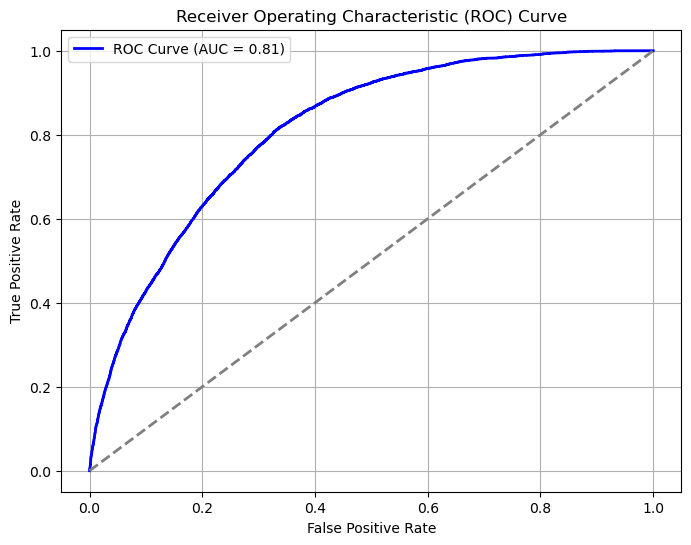

In [23]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
models = [('logModel',LogisticRegression()),
          ('dt_Model',DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=2, min_samples_leaf=1, class_weight='balanced')),
          ('nb_Model', GaussianNB()),
          ('knn_Model', KNeighborsClassifier(n_neighbors=19))]

voting_model = VotingClassifier(estimators=models, voting='soft')

voting_model.fit(train_norm, target_train)

for name, model in voting_model.named_estimators_.items():
    print(f"Performance of {name}:")
    print(classification_report(target_test, model.predict(test_norm)))
    
voting_pred = voting_model.predict(test_norm)

print("\nEnsemble Model Classification Report:")
print(classification_report(target_test, voting_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(target_test, voting_pred)
print(conf_matrix)

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Ensemble Model Confusion Matrix")
plt.show()

ensemble_proba = voting_model.predict_proba(test_norm)[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, ensemble_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid()
plt.show()

In [24]:
models = [('logModel',LogisticRegression()),
          ('dt_Model',DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=2, min_samples_leaf=1, class_weight='balanced')),
          ('nb_Model', GaussianNB()),
          ('knn_Model', KNeighborsClassifier(n_neighbors=19))]

voting_model = VotingClassifier(estimators=models, voting='hard')

voting_model.fit(train_norm, target_train)

for name, model in voting_model.named_estimators_.items():
    print(f"Performance of {name}:")
    print(classification_report(target_test, model.predict(test_norm)))
    
voting_pred = voting_model.predict(test_norm)
print("\nEnsemble Model Classification Report:")
print(classification_report(target_test, voting_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(target_test, voting_pred)
print(conf_matrix)


Performance of logModel:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43667
           1       0.54      0.15      0.23      7069

    accuracy                           0.86     50736
   macro avg       0.71      0.56      0.58     50736
weighted avg       0.83      0.86      0.83     50736

Performance of dt_Model:
              precision    recall  f1-score   support

           0       0.95      0.70      0.80     43667
           1       0.29      0.76      0.42      7069

    accuracy                           0.71     50736
   macro avg       0.62      0.73      0.61     50736
weighted avg       0.86      0.71      0.75     50736

Performance of nb_Model:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86     43667
           1       0.32      0.56      0.41      7069

    accuracy                           0.77     50736
   macro avg       0.62      0.68      0.63     50736

__SMOTE Data__

Performance of logModel:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83     43667
           1       0.32      0.75      0.45      7069

    accuracy                           0.74     50736
   macro avg       0.63      0.74      0.64     50736
weighted avg       0.86      0.74      0.78     50736

Performance of dt_Model:
              precision    recall  f1-score   support

           0       0.94      0.50      0.65     43667
           1       0.20      0.79      0.32      7069

    accuracy                           0.54     50736
   macro avg       0.57      0.64      0.49     50736
weighted avg       0.83      0.54      0.60     50736

Performance of nb_Model:
              precision    recall  f1-score   support

           0       0.95      0.69      0.80     43667
           1       0.28      0.75      0.41      7069

    accuracy                           0.70     50736
   macro avg       0.61      0.72      0.61     50736

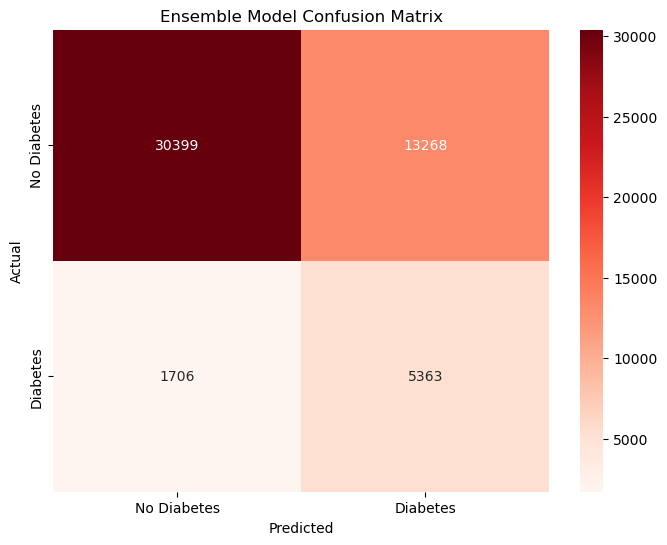

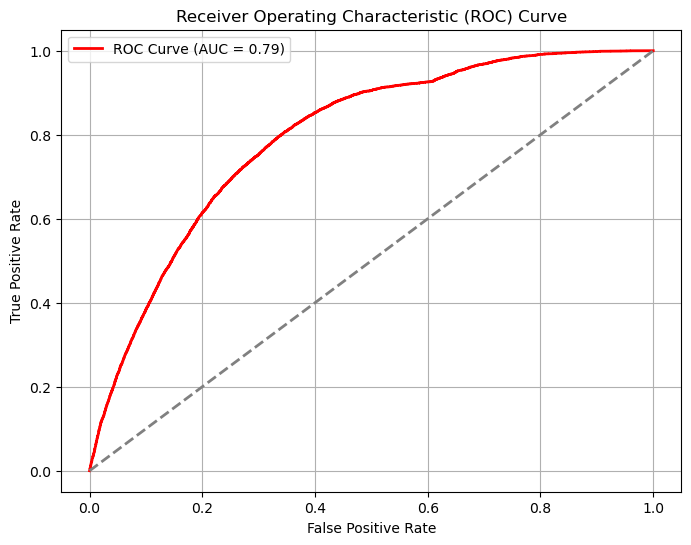

In [25]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

models = [('logModel',LogisticRegression()),
          ('dt_Model',DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=10, min_samples_leaf=1, class_weight='balanced')),
          ('nb_Model', GaussianNB()),
          ('knn_Model', KNeighborsClassifier(n_neighbors=3))]

voting_model = VotingClassifier(estimators=models, voting='soft')

voting_model.fit(train_resampled, target_train_resampled)

for name, model in voting_model.named_estimators_.items():
    print(f"Performance of {name}:")
    print(classification_report(target_test, model.predict(test_norm)))

voting_pred = voting_model.predict(test_norm)

print("\nEnsemble Model Classification Report:")
print(classification_report(target_test, voting_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(target_test, voting_pred)
print(conf_matrix)

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Ensemble Model Confusion Matrix")
plt.show()

ensemble_proba = voting_model.predict_proba(test_norm)[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, ensemble_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.grid()
plt.legend()
plt.show()

In [26]:
models = [('logModel',LogisticRegression()),
          ('dt_Model',DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=10, min_samples_leaf=1, class_weight='balanced')),
          ('nb_Model', GaussianNB()),
          ('knn_Model', KNeighborsClassifier(n_neighbors=3))]

voting_model = VotingClassifier(estimators=models, voting='hard')

voting_model.fit(train_resampled, target_train_resampled)

for name, model in voting_model.named_estimators_.items():
    print(f"Performance of {name}:")
    print(classification_report(target_test, model.predict(test_norm)))

voting_pred = voting_model.predict(test_norm)

print("\nEnsemble Model Classification Report:")
print(classification_report(target_test, voting_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(target_test, voting_pred)
print(conf_matrix)


Performance of logModel:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83     43667
           1       0.32      0.75      0.45      7069

    accuracy                           0.74     50736
   macro avg       0.63      0.74      0.64     50736
weighted avg       0.86      0.74      0.78     50736

Performance of dt_Model:
              precision    recall  f1-score   support

           0       0.94      0.50      0.65     43667
           1       0.20      0.79      0.32      7069

    accuracy                           0.54     50736
   macro avg       0.57      0.64      0.49     50736
weighted avg       0.83      0.54      0.60     50736

Performance of nb_Model:
              precision    recall  f1-score   support

           0       0.95      0.69      0.80     43667
           1       0.28      0.75      0.41      7069

    accuracy                           0.70     50736
   macro avg       0.61      0.72      0.61     50736

## Results

In [27]:
import pandas as pd

normalized_data = {
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Naive Bayes",
        "K-Nearest Neighbors (KNN)",
        "Ensemble (Soft Voting)",
        "Ensemble (Hard Voting)"
    ],
    "Accuracy": [86.35, 86.47, 77.31, 86.00, 83.00, 86.00],
    "Precision (Class 1)": [0.54, 0.48, 0.32, 0.39, 0.39, 0.50],
    "Recall (Class 1)": [0.15, 0.05, 0.56, 0.19, 0.46, 0.19],
    "F1-Score (Class 1)": [0.23, 0.10, 0.41, 0.26, 0.42, 0.28]
}

df_normalized = pd.DataFrame(normalized_data)
df_normalized

Model  Accuracy  Precision (Class 1)  Recall (Class 1)  \
0        Logistic Regression     86.35                 0.54              0.15   
1              Decision Tree     86.47                 0.48              0.05   
2                Naive Bayes     77.31                 0.32              0.56   
3  K-Nearest Neighbors (KNN)     86.00                 0.39              0.19   
4     Ensemble (Soft Voting)     83.00                 0.39              0.46   
5     Ensemble (Hard Voting)     86.00                 0.50              0.19   

   F1-Score (Class 1)  
0                0.23  
1                0.10  
2                0.41  
3                0.26  
4                0.42  
5                0.28

In [28]:
smote_data = {
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Naive Bayes",
        "K-Nearest Neighbors (KNN)",
        "Ensemble (Soft Voting)",
        "Ensemble (Hard Voting)"
    ],
    "Accuracy": [74.00, 83.90, 70.00, 74.00, 71.00, 76.00],
    "Precision (Class 1)": [0.32, 0.37, 0.28, 0.27, 0.29, 0.33],
    "Recall (Class 1)": [0.75, 0.23, 0.75, 0.51, 0.76, 0.68],
    "F1-Score (Class 1)": [0.45, 0.29, 0.41, 0.36, 0.42, 0.44]
}

df_smote = pd.DataFrame(smote_data)
display(df_smote)

Model  Accuracy  Precision (Class 1)  Recall (Class 1)  \
0        Logistic Regression      74.0                 0.32              0.75   
1              Decision Tree      83.9                 0.37              0.23   
2                Naive Bayes      70.0                 0.28              0.75   
3  K-Nearest Neighbors (KNN)      74.0                 0.27              0.51   
4     Ensemble (Soft Voting)      71.0                 0.29              0.76   
5     Ensemble (Hard Voting)      76.0                 0.33              0.68   

   F1-Score (Class 1)  
0                0.45  
1                0.29  
2                0.41  
3                0.36  
4                0.42  
5                0.44